In [123]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
plt.rcParams['pdf.fonttype'] = 42

In [124]:
samples = ["1","3","5","7"]
data = [pd.read_csv('s' + i +'-quantification.csv') for i in samples]

for i in range(len(samples)):
    data[i]['cellID'] = data[i]['CellID'].values
    data[i]['CFP'] = data[i][' AverageBrightness(Seg)_C0'].values
    data[i]['FRET'] = data[i][' AverageBrightness(Seg)_C1'].values
    data[i]['RFP'] = data[i][' AverageBrightness(Seg)_C2'].values
    data[i]['iRFP'] = data[i][' AverageBrightness(Seg)_C3'].values
    data[i]['Time from treatment (min)'] = data[i][' ImgNo'].values*2 -6
    data[i]['FRET/CFP'] = data[i][' AverageBrightness(Seg)_C1'].values/data[i][' AverageBrightness(Seg)_C0'].values
    data[i]['Norm Gem'] = data[i][' AverageBrightness(Seg)_C2'].values/data[i][' AverageBrightness(Seg)_C3'].values
    data[i] = data[i].drop(data[i].columns[np.arange(0,113)], axis=1)
data[0]

cellID          CFP         FRET         RFP         iRFP  \
0         1  1288.896067  1731.963483  279.123596  1034.929775   
1         1  1324.434018  1784.439883  272.249267  1061.322581   
2         1  1326.686782  1789.250000  282.959770  1053.422414   
3         1  1378.579545  1810.096591  276.696023  1043.289773   
4         1  1785.913043  2343.695652  276.007905  1359.268775   
..      ...          ...          ...         ...          ...   
763      50   559.379310   769.303448  228.122414   376.839655   
764      50   569.223265   798.311445  229.731707   383.574109   
765      50   591.429769   831.450734  226.580713   389.293501   
766      50   544.656075   767.637383  224.285981   378.373832   
767      50   540.757455   768.514911  225.288270   378.449304   

     Time from treatment (min)  FRET/CFP  Norm Gem  
0                           -6  1.343757  0.269703  
1                           -4  1.347323  0.256519  
2                           -2  1.348660  0.268610  
3                            0  1.313016  0.265215  
4                            2  1.312323  0.203056  
..                         ...       ...       ...  
763                         16  1.375280  0.605357  
764                         18  1.402458  0.598924  
765                         20  1.405832  0.582031  
766                         22  1.409398  0.592763  
767                         24  1.421182  0.595293  

[768 rows x 8 columns]

In [125]:
FRET_CFP_pivot = []
Norm_Gem_pivot = []
FRET_CFP_pivot_norm = []
FRET_CFP_pivot_delta = []
FRET_CFP_gain = []
for i in range(len(samples)):
    FRET_CFP_pivot.append(data[i].pivot(index="Time from treatment (min)", columns="cellID", values="FRET/CFP"))
    Norm_Gem_pivot.append(data[i].pivot(index="Time from treatment (min)", columns="cellID", values="Norm Gem"))
    FRET_CFP_pivot_norm.append(FRET_CFP_pivot[i]/FRET_CFP_pivot[i].iloc[:4,:].mean())
    FRET_CFP_pivot_delta.append(FRET_CFP_pivot[i]-FRET_CFP_pivot[i].iloc[:4,:].mean())
    FRET_CFP_gain.append(FRET_CFP_pivot[i].iloc[-4:,:].mean() - FRET_CFP_pivot[i].iloc[:4,:].mean())
FRET_CFP_pivot_norm[0]

cellID                           1         2         3         4         5   \
Time from treatment (min)                                                     
-6                         1.004161  1.005238  0.999777  0.995904  0.999855   
-4                         1.006825  0.999599  1.005049  1.007011  1.003895   
-2                         1.007825  1.004524  0.998007  1.002882  0.997131   
 0                         0.981189  0.990639  0.997166  0.994203  0.999119   
 2                         0.980671  0.982141  1.008687  0.996938  0.985637   
 4                         0.983897  0.992389  1.019468  1.013986  1.001342   
 6                         0.998391  1.002947  1.029810  1.018009  1.001878   
 8                         1.021235  1.014932  1.023797  1.032594  1.019282   
 10                        1.043669  1.024128  1.033658  1.042951  1.025904   
 12                        1.054670  1.051974  1.040086  1.045484  1.028539   
 14                        1.067428  1.070827  1.044400  1.061938  1.034578   
 16                        1.084135  1.078920  1.048805  1.055556  1.033849   
 18                        1.092683  1.111753  1.058022  1.070639  1.054467   
 20                        1.105839  1.092913  1.058573  1.065727  1.045210   
 22                        1.108403  1.093627  1.051430  1.064724  1.044230   
 24                        1.137899  1.115172  1.064346  1.071273  1.049891   

cellID                           6         7         8         9         10  \
Time from treatment (min)                                                     
-6                         0.998776  0.995692  1.001374  0.999517  1.002865   
-4                         1.001265  1.007700  1.002078  1.001469  0.999801   
-2                         1.002070  1.001496  0.998835  1.004784  1.001909   
 0                         0.997889  0.995112  0.997712  0.994230  0.995425   
 2                         1.012691  0.997467  0.997148  0.994707  0.996461   
 4                         1.018053  0.997449  1.014280  1.004989  1.004763   
 6                         1.026839  1.006327  1.016787  1.019574  1.022511   
 8                         1.030100  1.005099  1.025330  1.029820  1.030059   
 10                        1.034244  1.013755  1.032453  1.050292  1.029460   
 12                        1.036301  1.013197  1.041208  1.059944  1.036418   
 14                        1.045107  1.034246  1.044788  1.073837  1.037855   
 16                        1.052752  1.040772  1.057363  1.080007  1.045373   
 18                        1.064376  1.048024  1.061365  1.078122  1.038575   
 20                        1.055261  1.049130  1.069134  1.094585  1.049899   
 22                        1.060840  1.042369  1.060934  1.091216  1.055450   
 24                        1.069871  1.049209  1.079081  1.093022  1.050310   

cellID                     ...        41        42        43        44  \
Time from treatment (min)  ...                                           
-6                         ...  0.999013  1.001404  0.995638  0.993432   
-4                         ...  1.006947  0.996563  0.996855  1.002074   
-2                         ...  1.004270  1.000551  1.008300  1.015616   
 0                         ...  0.989770  1.001482  0.999206  0.988878   
 2                         ...  1.091304  1.014759  1.003548  0.996220   
 4                         ...  1.105295  1.025134  1.004748  0.990439   
 6                         ...  1.111975  1.030505  1.008474  1.001999   
 8                         ...  1.111558  1.039890  1.012789  1.009933   
 10                        ...  1.108832  1.051537  1.022099  1.008891   
 12                        ...  1.127348  1.050976  1.009506  1.018338   
 14                        ...  1.148102  1.064984  1.024778  1.039822   
 16                        ...  1.132326  1.064931  1.034606  1.025850   
 18                        ...  1.132021  1.070508  1.050973  1.037846   
 20                        ...  1.159289  1.

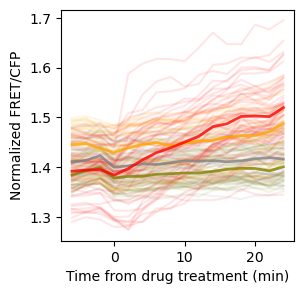

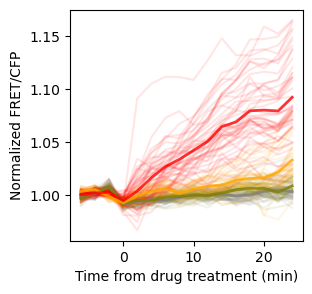

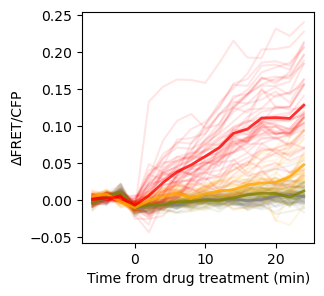

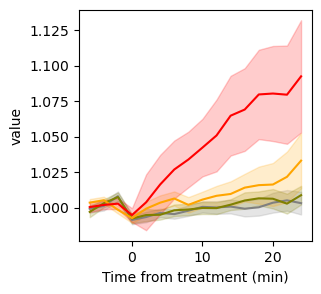

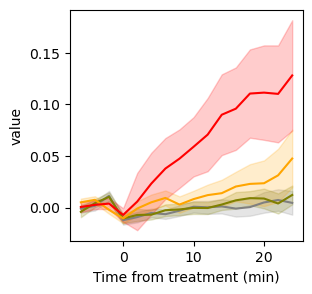

In [126]:
colors = ['red','orange','olive','gray']
labels = ['100 nM','10 nM','1 nM','DMSO']

plt.figure(figsize=(3,3))
for i in range(len(samples)):
    plt.plot(FRET_CFP_pivot[3-1*i], color=colors[3-1*i],alpha=0.1)
for i in range(len(samples)):
    plt.plot(FRET_CFP_pivot[3-1*i].mean(axis=1), color=colors[3-1*i],alpha=0.8, lw=2)
plt.xlabel('Time from drug treatment (min)')
plt.ylabel('Normalized FRET/CFP')
plt.savefig('FRET-CFP-raw.pdf')
plt.show()

plt.figure(figsize=(3,3))
for i in range(len(samples)):
    plt.plot(FRET_CFP_pivot_norm[3-1*i], color=colors[3-1*i],alpha=0.1)
for i in range(len(samples)):
    plt.plot(FRET_CFP_pivot_norm[3-1*i].mean(axis=1), color=colors[3-1*i],alpha=0.8, lw=2)
plt.xlabel('Time from drug treatment (min)')
plt.ylabel('Normalized FRET/CFP')
plt.savefig('FRET-CFP-normalized.pdf')
plt.show()

plt.figure(figsize=(3,3))
for i in range(len(samples)):
    plt.plot(FRET_CFP_pivot_delta[3-1*i], color=colors[3-1*i],alpha=0.1)
for i in range(len(samples)):
    plt.plot(FRET_CFP_pivot_delta[3-1*i].mean(axis=1), color=colors[3-1*i],alpha=0.8, lw=2)
plt.xlabel('Time from drug treatment (min)')
plt.ylabel('ΔFRET/CFP')
plt.savefig('FRET-CFP-delta.pdf')
plt.show()


plt.figure(figsize=(3,3))
for i in range(len(samples)):
    sns.lineplot(data=FRET_CFP_pivot_norm[3-1*i].reset_index().melt(id_vars="Time from treatment (min)"), x="Time from treatment (min)", y='value',color=colors[3-1*i], errorbar='sd')
plt.savefig('FRET-CFP-normalized-area.pdf')
plt.show()

plt.figure(figsize=(3,3))
for i in range(len(samples)):
    sns.lineplot(data=FRET_CFP_pivot_delta[3-1*i].reset_index().melt(id_vars="Time from treatment (min)"), x="Time from treatment (min)", y='value',color=colors[3-1*i], errorbar='sd')
plt.savefig('FRET-CFP-delta-area.pdf')
plt.show()


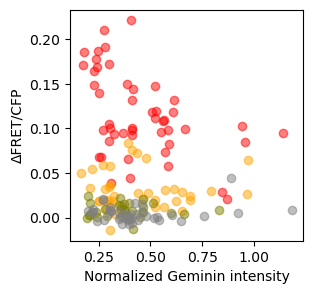

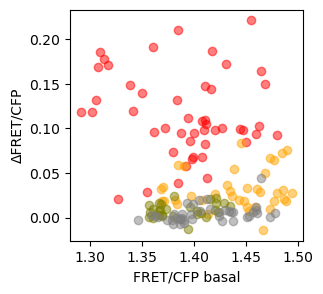

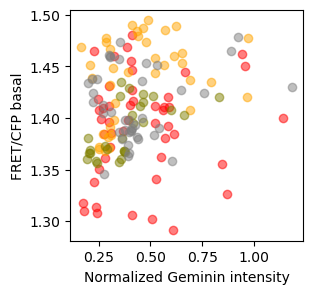

In [127]:
plt.figure(figsize=(3,3))
for i in range(len(samples)):
    plt.scatter(Norm_Gem_pivot[i].mean().values, FRET_CFP_gain[i].values, color=colors[i], alpha=0.5)
plt.xlabel('Normalized Geminin intensity')
plt.ylabel('ΔFRET/CFP')
#plt.xscale('log')
plt.savefig('Gem-vs-FRET-CFP-gain.pdf')
plt.show()

plt.figure(figsize=(3,3))
for i in range(len(samples)):
    plt.scatter(FRET_CFP_pivot[i].iloc[:4,:].mean().values, FRET_CFP_gain[i].values, color=colors[i], alpha=0.5)
plt.xlabel('FRET/CFP basal')
plt.ylabel('ΔFRET/CFP')
plt.savefig('Basal-vs-FRET-CFP-gain.pdf')
plt.show()

plt.figure(figsize=(3,3))
for i in range(len(samples)):
    plt.scatter(Norm_Gem_pivot[i].mean().values, FRET_CFP_pivot[i].iloc[:4,:].mean().values, color=colors[i], alpha=0.5)
plt.xlabel('Normalized Geminin intensity')
plt.ylabel('FRET/CFP basal')
#plt.xscale('log')
plt.savefig('Gem-vs-basal.pdf')
plt.show()

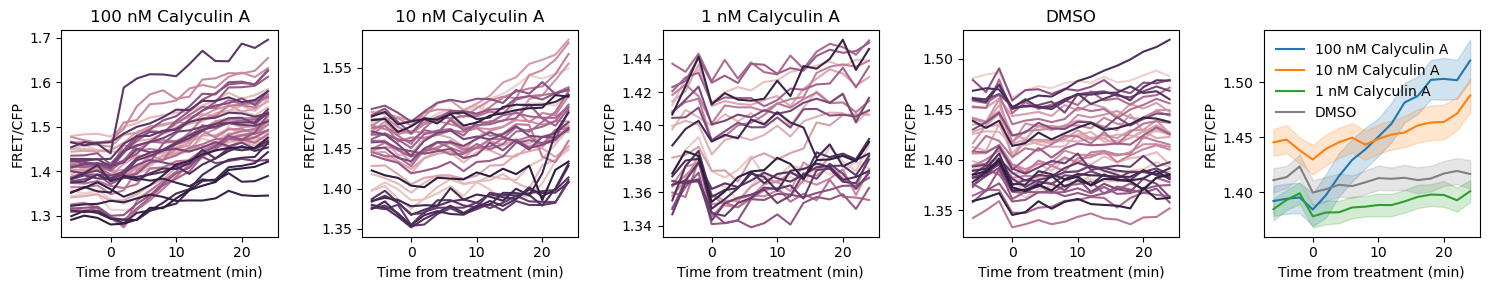

In [128]:
plt.figure(figsize=(15,3))
plt.subplot(1,5,1)
sns.lineplot(data=data[0], x='Time from treatment (min)',y='FRET/CFP',hue='cellID', legend=False)
#plt.ylim(1.2,1.7)
plt.title('100 nM Calyculin A')

plt.subplot(1,5,2)
sns.lineplot(data=data[1], x='Time from treatment (min)',y='FRET/CFP',hue='cellID', legend=False)
#plt.ylim(1.2,1.7)
plt.title('10 nM Calyculin A')

plt.subplot(1,5,3)
sns.lineplot(data=data[2], x='Time from treatment (min)',y='FRET/CFP',hue='cellID', legend=False)
#plt.ylim(1.2,1.7)
plt.title('1 nM Calyculin A')

plt.subplot(1,5,4)
sns.lineplot(data=data[3], x='Time from treatment (min)',y='FRET/CFP',hue='cellID', legend=False)
#plt.ylim(1.2,1.7)
plt.title('DMSO')


plt.subplot(1,5,5)
sns.lineplot(data=data[0], x='Time from treatment (min)',y='FRET/CFP',label='100 nM Calyculin A')
sns.lineplot(data=data[1], x='Time from treatment (min)',y='FRET/CFP',label='10 nM Calyculin A')
sns.lineplot(data=data[2], x='Time from treatment (min)',y='FRET/CFP',label='1 nM Calyculin A')
sns.lineplot(data=data[3], x='Time from treatment (min)',y='FRET/CFP',label='DMSO', color='gray')
#plt.ylim(1.2,1.7)
plt.legend(loc='upper left',frameon=False)

plt.tight_layout()
plt.show()

In [161]:
fvalue, pvalue = stats.f_oneway(FRET_CFP_pivot_delta[0].iloc[:-5,:].mean().values,
                                FRET_CFP_pivot_delta[1].iloc[:-5,:].mean().values,
                                FRET_CFP_pivot_delta[2].iloc[:-5,:].mean().values,
                                FRET_CFP_pivot_delta[3].iloc[:-5,:].mean().values,)
print(fvalue)
print(pvalue)

for i in range(4):
    print(FRET_CFP_pivot_delta[i].iloc[:-5,:].mean().values.shape[0])

deltas, samples = [], []
deltas = np.hstack([deltas,FRET_CFP_pivot_delta[0].iloc[:-5,:].mean().values])
deltas = np.hstack([deltas,FRET_CFP_pivot_delta[1].iloc[:-5,:].mean().values])
deltas = np.hstack([deltas,FRET_CFP_pivot_delta[2].iloc[:-5,:].mean().values])
deltas = np.hstack([deltas,FRET_CFP_pivot_delta[3].iloc[:-5,:].mean().values])

samples = np.hstack([samples, np.full(FRET_CFP_pivot_delta[0].iloc[:-5,:].mean().values.shape[0],100)])
samples = np.hstack([samples, np.full(FRET_CFP_pivot_delta[1].iloc[:-5,:].mean().values.shape[0],10)])
samples = np.hstack([samples, np.full(FRET_CFP_pivot_delta[2].iloc[:-5,:].mean().values.shape[0],1)])
samples = np.hstack([samples, np.full(FRET_CFP_pivot_delta[3].iloc[:-5,:].mean().values.shape[0],0)])

df_stats = pd.DataFrame([deltas,samples], index=['deltaFRET/CFP','sample_num']).T

tukey = pairwise_tukeyhsd(df_stats['deltaFRET/CFP'],df_stats['sample_num'])
tukey.summary()

97.32875953141006
4.1192360278249004e-35
48
38
28
41


<class 'statsmodels.iolib.table.SimpleTable'>